In [1]:
import datetime
import sys, os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import scanpy as sc
sc.logging.print_memory_usage()
sc.settings.verbosity = 2
sc.settings.set_figure_params(dpi = 300, dpi_save = 300)
sc.logging.print_header()

from matplotlib.pyplot import rc_context

Memory usage: current 0.21 GB, difference +0.21 GB
scanpy==1.10.2 anndata==0.10.8 umap==0.5.5 numpy==1.26.4 scipy==1.13.0 pandas==2.0.3 scikit-learn==1.4.2 statsmodels==0.14.2 igraph==0.11.6 pynndescent==0.5.13


In [3]:
# add the utility functions folder to PATH
sys.path.append(os.path.abspath("../packages"))
from db_dev.helper import *

In [4]:
#load data with leiden
#home_dir = os.path.expanduser("~")
current_directory = os.getcwd()
adata = sc.read_h5ad(current_directory+"/backups/bb1_bb2_leiden_2.5_sub_DGE_round2_v1_86447x37733_241024_09h09.h5ad")

In [5]:
# Loading AML, T-cells and Neutrophils refined annotation

#Loading obs
current_directory = os.getcwd()
# overwrite obs with the most recent version
filename = current_directory+"/backups/neutrophils_leiden_1.0_sub_annotation_obs_32719x29_241028_11h55.npz"
encoding = "latin1"

with np.load(filename, encoding=encoding, allow_pickle = True) as f:
    obs_n = pd.DataFrame(**f)


#Loading obs
current_directory = os.getcwd()
# overwrite obs with the most recent version
filename = current_directory+"/backups/t_cells_leiden_1.0_sub_annotation_obs_24181x29_241028_11h57.npz"
encoding = "latin1"

with np.load(filename, encoding=encoding, allow_pickle = True) as f:
    obs_t = pd.DataFrame(**f)


#Loading obs
current_directory = os.getcwd()
# overwrite obs with the most recent version
filename = current_directory+"/backups/aml_leiden_1.0_sub_annotation_obs_12062x29_241107_10h20.npz"
encoding = "latin1"

with np.load(filename, encoding=encoding, allow_pickle = True) as f:
    obs_a = pd.DataFrame(**f)




In [6]:
# loading obs onto adata
adata.obs["cell_type_t"] = obs_t["cell_type_t"]
adata.obs["leiden_1.0_sub_t"] = obs_t["leiden_1.0_sub"]

# loading obs onto adata
adata.obs["cell_type_neutrophils"] = obs_n["cell_type_n"]
adata.obs["leiden_1.0_sub_neutrophils"] = obs_n["leiden_1.0_sub"]

# loading obs onto adata
adata.obs["cell_type_aml"] = obs_a["cell_type_a"]
adata.obs["leiden_1.0_sub_aml"] = obs_a["leiden_1.0_sub"]




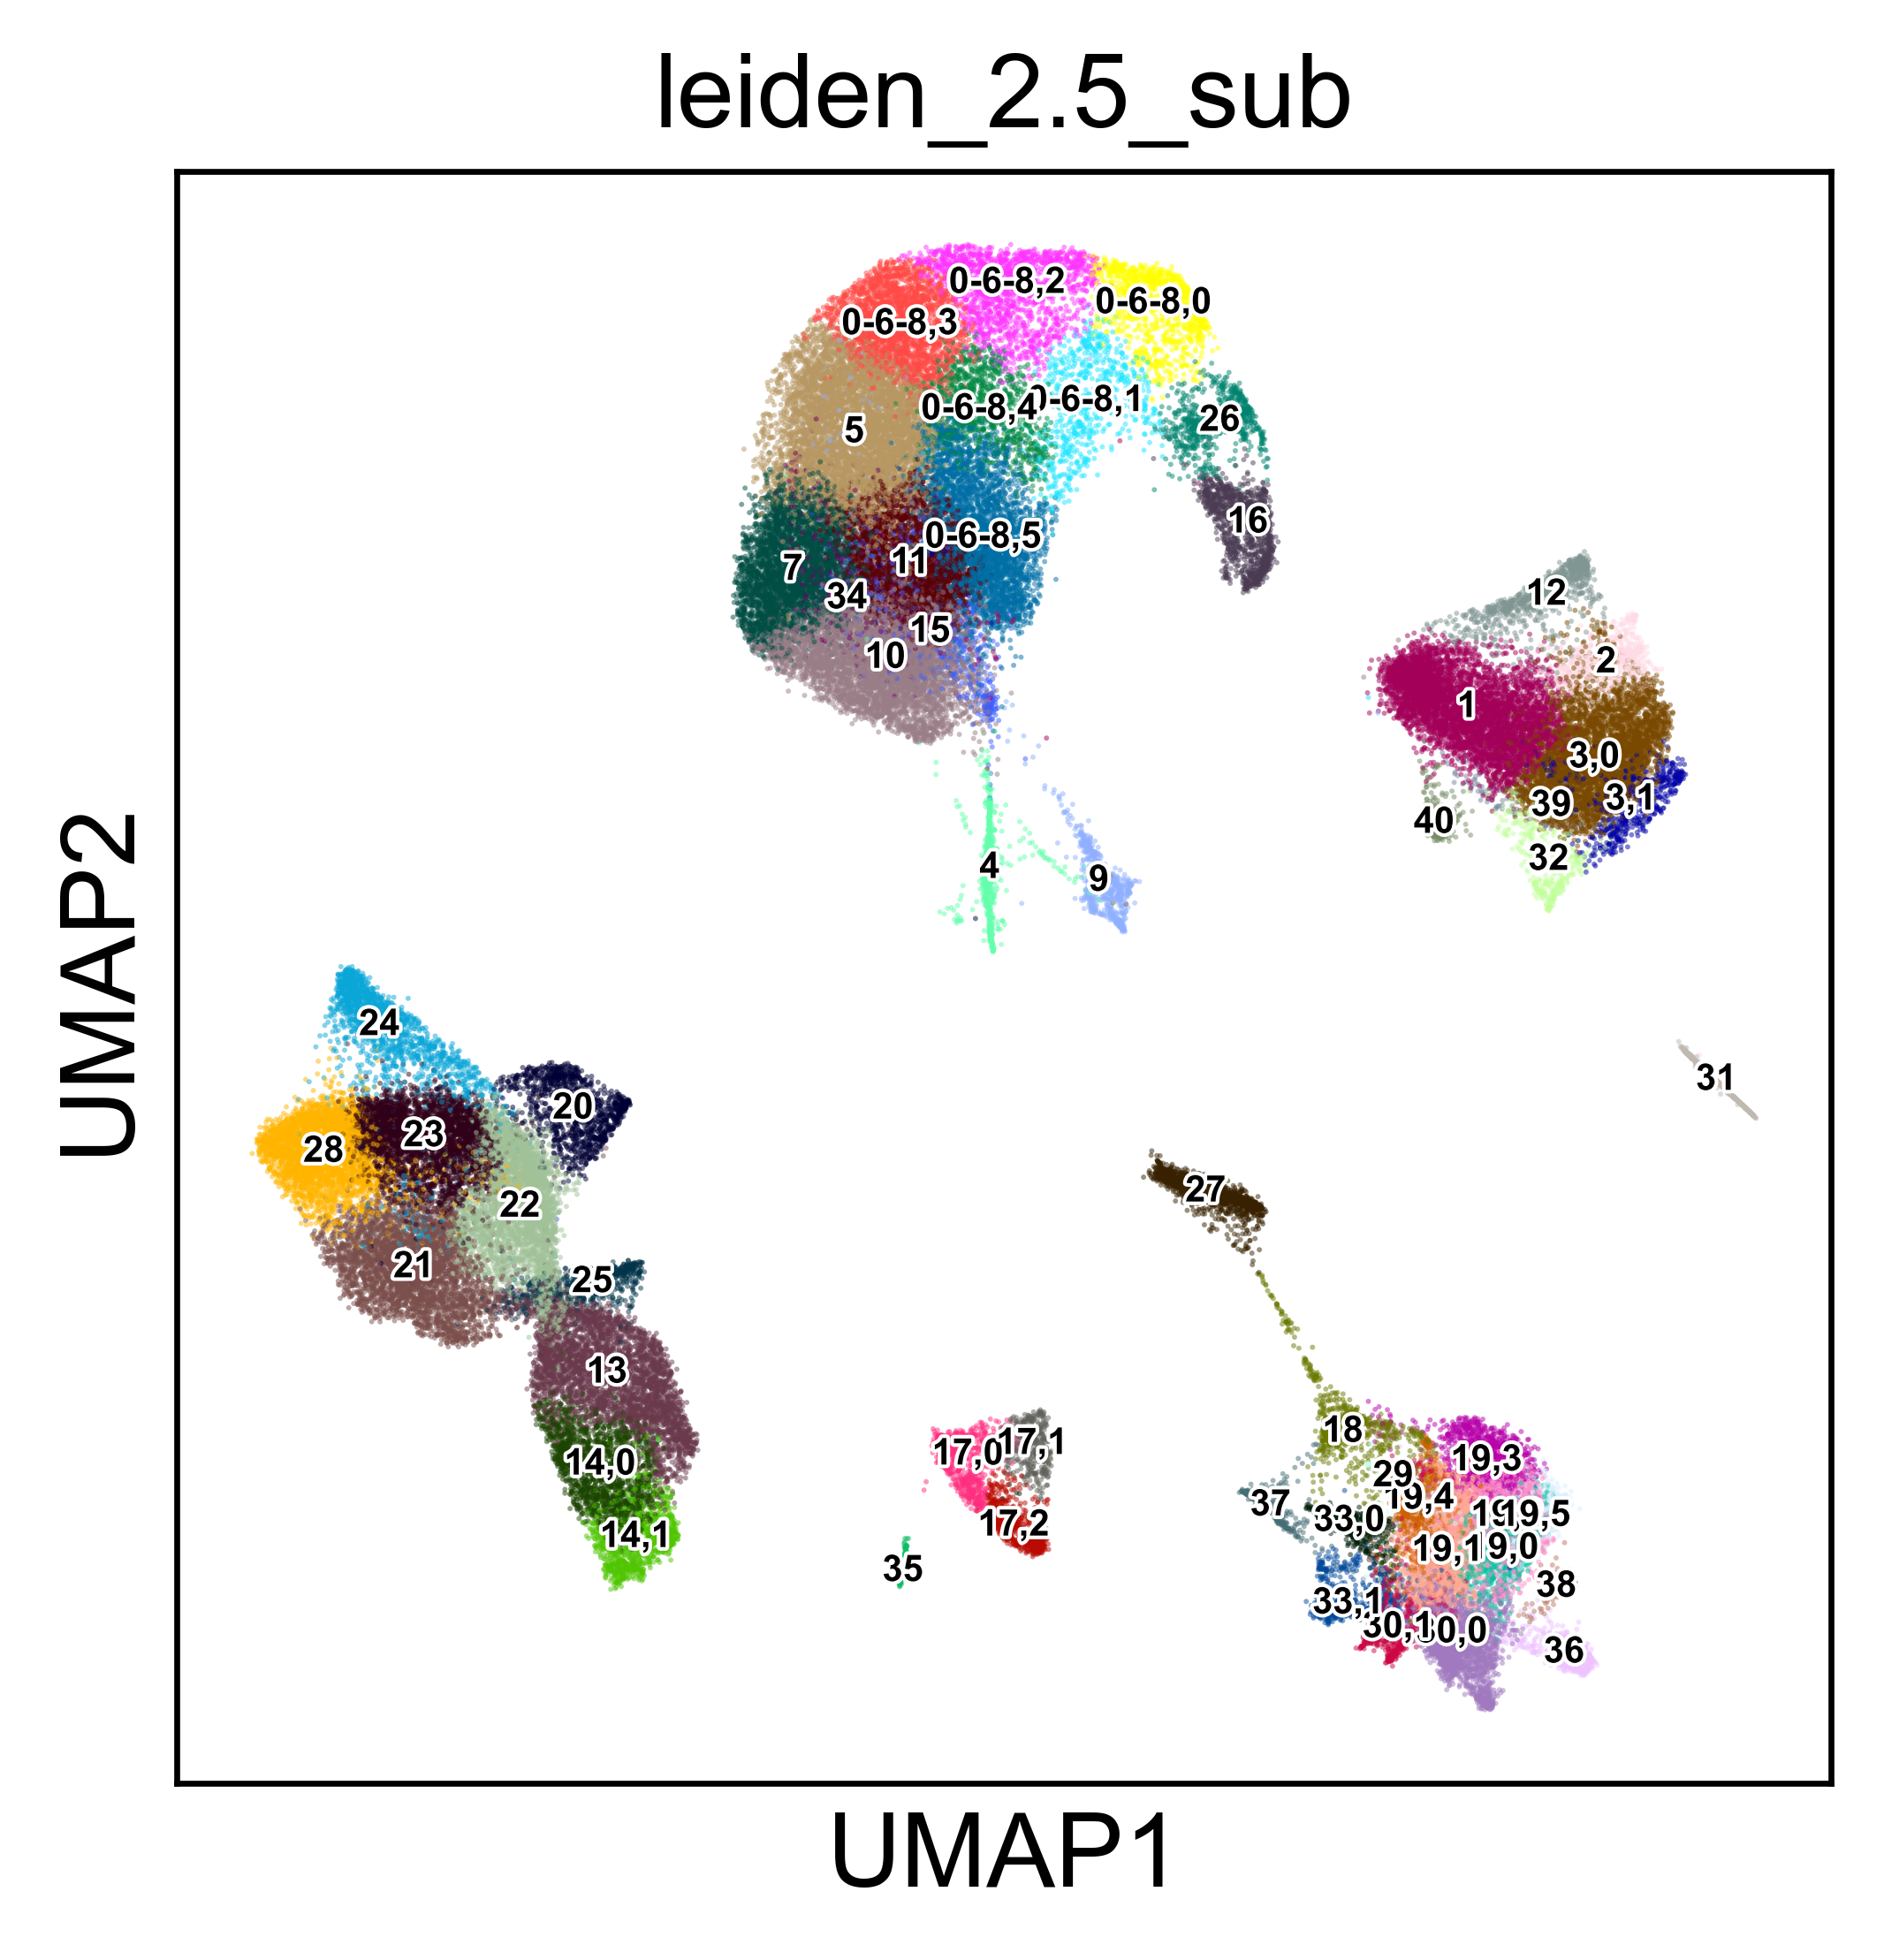

In [49]:
sc.pl.umap(adata, color = ["leiden_2.5_sub"], 
           alpha = 0.5, 
           wspace = 0.5,
           ncols = 3,
           s = 2, 
           legend_loc = "on data", legend_fontsize = 5, legend_fontoutline = True)

In [118]:
for i, x in enumerate(adata.obs["leiden_2.5_sub"].unique()): 
    print(f'"{x}":"N/A ({x})",')

"0-6-8,0":"N/A (0-6-8,0)",
"1":"N/A (1)",
"5":"N/A (5)",
"0-6-8,2":"N/A (0-6-8,2)",
"0-6-8,3":"N/A (0-6-8,3)",
"3,0":"N/A (3,0)",
"7":"N/A (7)",
"0-6-8,1":"N/A (0-6-8,1)",
"12":"N/A (12)",
"10":"N/A (10)",
"13":"N/A (13)",
"11":"N/A (11)",
"16":"N/A (16)",
"14,0":"N/A (14,0)",
"0-6-8,5":"N/A (0-6-8,5)",
"17,0":"N/A (17,0)",
"18":"N/A (18)",
"0-6-8,4":"N/A (0-6-8,4)",
"20":"N/A (20)",
"17,1":"N/A (17,1)",
"21":"N/A (21)",
"22":"N/A (22)",
"26":"N/A (26)",
"27":"N/A (27)",
"23":"N/A (23)",
"28":"N/A (28)",
"15":"N/A (15)",
"4":"N/A (4)",
"17,2":"N/A (17,2)",
"9":"N/A (9)",
"14,1":"N/A (14,1)",
"25":"N/A (25)",
"29":"N/A (29)",
"19,0":"N/A (19,0)",
"24":"N/A (24)",
"31":"N/A (31)",
"32":"N/A (32)",
"33,0":"N/A (33,0)",
"34":"N/A (34)",
"2":"N/A (2)",
"19,1":"N/A (19,1)",
"30,0":"N/A (30,0)",
"19,4":"N/A (19,4)",
"35":"N/A (35)",
"19,5":"N/A (19,5)",
"36":"N/A (36)",
"37":"N/A (37)",
"30,1":"N/A (30,1)",
"19,3":"N/A (19,3)",
"33,1":"N/A (33,1)",
"19,2":"N/A (19,2)",
"38":"N/A (38)",
"3,1":

In [11]:
cell_type_dict = {
    
# Neutrophils
"26":"Precursors of Neutrophils",
"16":"Precursors of Neutrophils",
"0-6-8,0":"Early Immature Neutrophils",
"0-6-8,2":"Immature Neutrophils",
"0-6-8,1":"Immature Neutrophils",
"5":"Mature Neutrophils",
"11":"Mature Neutrophils",
"15":"Mature Neutrophils",
"0-6-8,4":"Mature Neutrophils",
"0-6-8,5":"Mature Neutrophils",
"0-6-8,3":"Mature Neutrophils",
"10":"Aged Neutrophils",
"7":"Aged Neutrophils",
"34":"Aged Neutrophils",

    
# Monocytes
"1":"CD14 Monocytes",
"3,0":"CD14 Monocytes",
"12":"CD16 Monocytes",
"2":"CD14CD16 Monocytes",
"40":"AML Monocytes 1",
"3,1":"AML Monocytes 2",
"32":"AML Monocytes 2",
"39":"AML Monocytes 2",

# B cells
"17,0":"Naive B cells",
"17,2":"Naive B cells",
"17,1":"Memory B cells",
"35":"Plasma cells",

## Other
"9":"Platelets",
"4":"Erythrocytes",
"31":"Dendritic cells",
"27":"Basophils",
#
## T cells
"14,0":"Tem/Temra cytotoxic T cells",
"13":"Tem/Temra cytotoxic T cells",
"21":"Tem/Effector helper T cells",
"22":"Tcm/Naive helper T cells",
"23":"Tcm/Naive helper T cells",
"28":"Tcm/Naive helper T cells",
"24":"Tcm/Naive cytotoxic T cells",
"25":"MAIT T cells",
"20":"Regulatory T cells",
"14,1":"NK cells",
#

## AML cells
"29":"AML cells 1",
"30,1":"AML cells 1",
"19,1":"AML cells 4", ###
"19,4":"AML cells 1", 
"37":"AML cells 2",
"33,0":"AML cells 3",
"33,1":"AML cells 3",
"19,0":"AML cells 4",
"19,2":"AML cells 4",
"19,3":"AML cells 4",
"19,5":"AML cells 4",
"30,0":"AML cells 4",
"36":"AML cells 5",
"38":"AML cells 6",
"18":"AML cells 10",
}
#



cell_type_color_palette = {
# orange
"AML cells 2": "#9e5423",
"AML cells 4": "#eb8f1e",
"AML cells 1": "#73472a",
"AML cells 3": "#ab3803",
"AML cells 5": "#f2621f",
"AML cells 6": "#ad0e0e",
"AML cells 7": "#cc1c00",
"AML cells 8": "#db5a46",
"AML cells 9": "#b85c38",
"AML cells 10": "#e07c57",

"AML Monocytes 1": "#8a0303",
"AML Monocytes 2": "#ff7043",

# redish
#"": "#ad0e0e",
"Platelets": "#b06c6c",
"Erythrocytes": "#db2f2c",

# pinkish
"Naive B cells": "#f2836f",
"Memory B cells": "#d65a5a",
"Plasma cells": "#820505",

# blue
"CD14 Monocytes": "#2041c7",
"CD16 Monocytes": "#007bff",
#"": "#004cff",
#"": "#477ead",
"CD14CD16 Monocytes": "#29ffcd",

#"": "#008ad4",
"Dendritic cells": "#602ab0",
#"Basophils": "#821665",
#"": "#9f47e6",
"Basophils": "#2d4173",

# purple
"Precursors of Neutrophils": "#84619c",
"Early Immature Neutrophils": "#d658f5",
"Immature Neutrophils": "#9846a8",
"Mature Neutrophils": "#532b6b",
"Aged Neutrophils": "#943886",
#"": "#9a5ce0",
#"": "#c744a8",

# green
"Tem/Temra cytotoxic T cells": "#596e32",
"Tem/Effector helper T cells": "#4f9e58",
"Tcm/Naive helper T cells": "#1b544c",
"Tcm/Naive cytotoxic T cells": "#21661e",
"MAIT T cells": "#62a87e", 
"Regulatory T cells": "#44ab89",
"NK cells": "#3bad48",
# "Type 1 helper T cells": "#2abf9a",
    
# gray
#"": "#5e5e5e",
}

In [12]:
adata.obs["cell_type"] = adata.obs["leiden_2.5_sub"].map(cell_type_dict).astype("category")

In [13]:
# Merging all annotation into one

adata.obs["cell_type_refined"] = adata.obs["cell_type_t"].where(pd.notna(adata.obs["cell_type_t"]), adata.obs["cell_type"])
adata.obs["cell_type_refined"] = adata.obs["cell_type_neutrophils"].where(pd.notna(adata.obs["cell_type_neutrophils"]), adata.obs["cell_type_refined"])
adata.obs["cell_type_refined"] = adata.obs["cell_type_aml"].where(pd.notna(adata.obs["cell_type_aml"]), adata.obs["cell_type_refined"])


adata.obs["cell_type_refined"] = adata.obs["cell_type_refined"].astype("category")




/Users/denis/mambaforge/envs/capseq_seurat_v3/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/Users/denis/mambaforge/envs/capseq_seurat_v3/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/Users/denis/mambaforge/envs/capseq_seurat_v3/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/Users/denis/mambaforge/envs/capseq_seurat_v3/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/Users/denis/mambaforge/envs/capseq_seurat_v3/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitMo

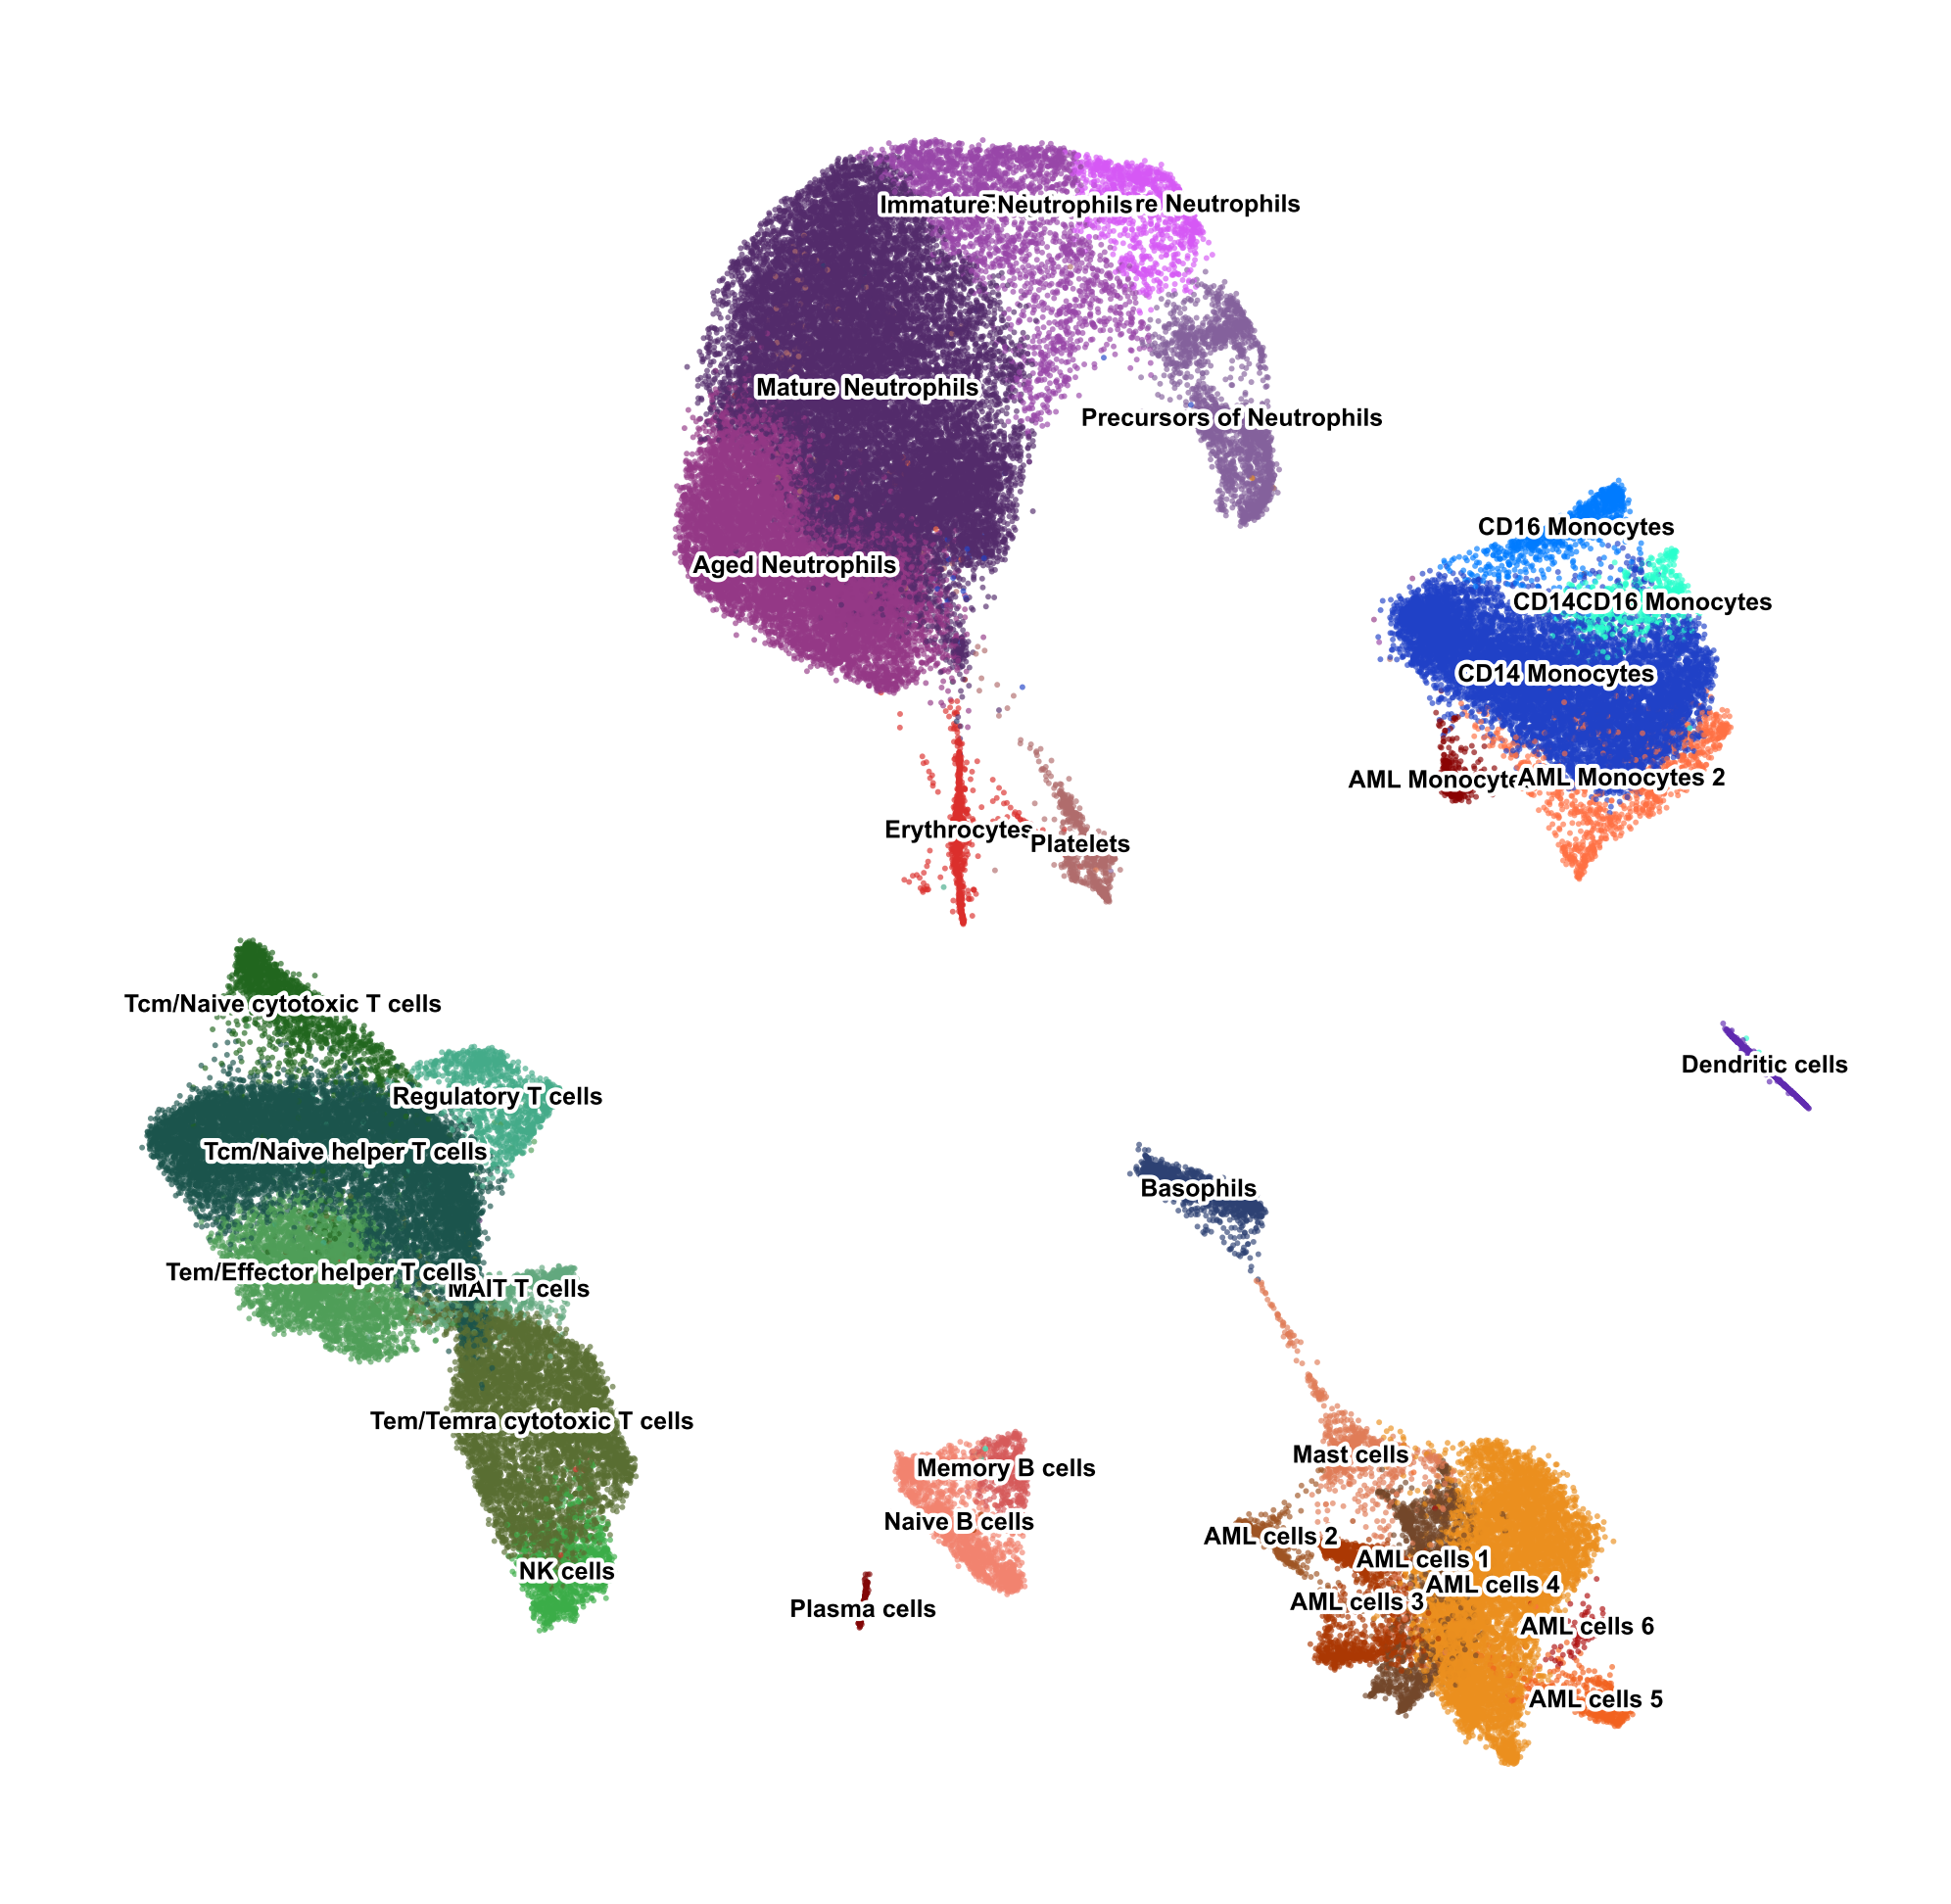

In [14]:
# To randomize cells
np.random.seed(69)
random_indices = np.random.permutation(list(range(adata.shape[0])))


sc.pl.umap(adata[random_indices, :], color = "cell_type", 
           alpha = 0.66, 
           wspace = 0.5,
           ncols = 3,
           s = 2, 
           frameon = False, title = "",
           legend_loc = "on data", legend_fontsize = 3, legend_fontoutline = True, 
           palette = cell_type_color_palette, #{"Plasma cells": "red"}, 
           save = "_cell_type_only_round2_v2.png")

/Users/denis/mambaforge/envs/capseq_dge/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/Users/denis/mambaforge/envs/capseq_dge/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/Users/denis/mambaforge/envs/capseq_dge/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/Users/denis/mambaforge/envs/capseq_dge/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/Users/denis/mambaforge/envs/capseq_dge/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to m

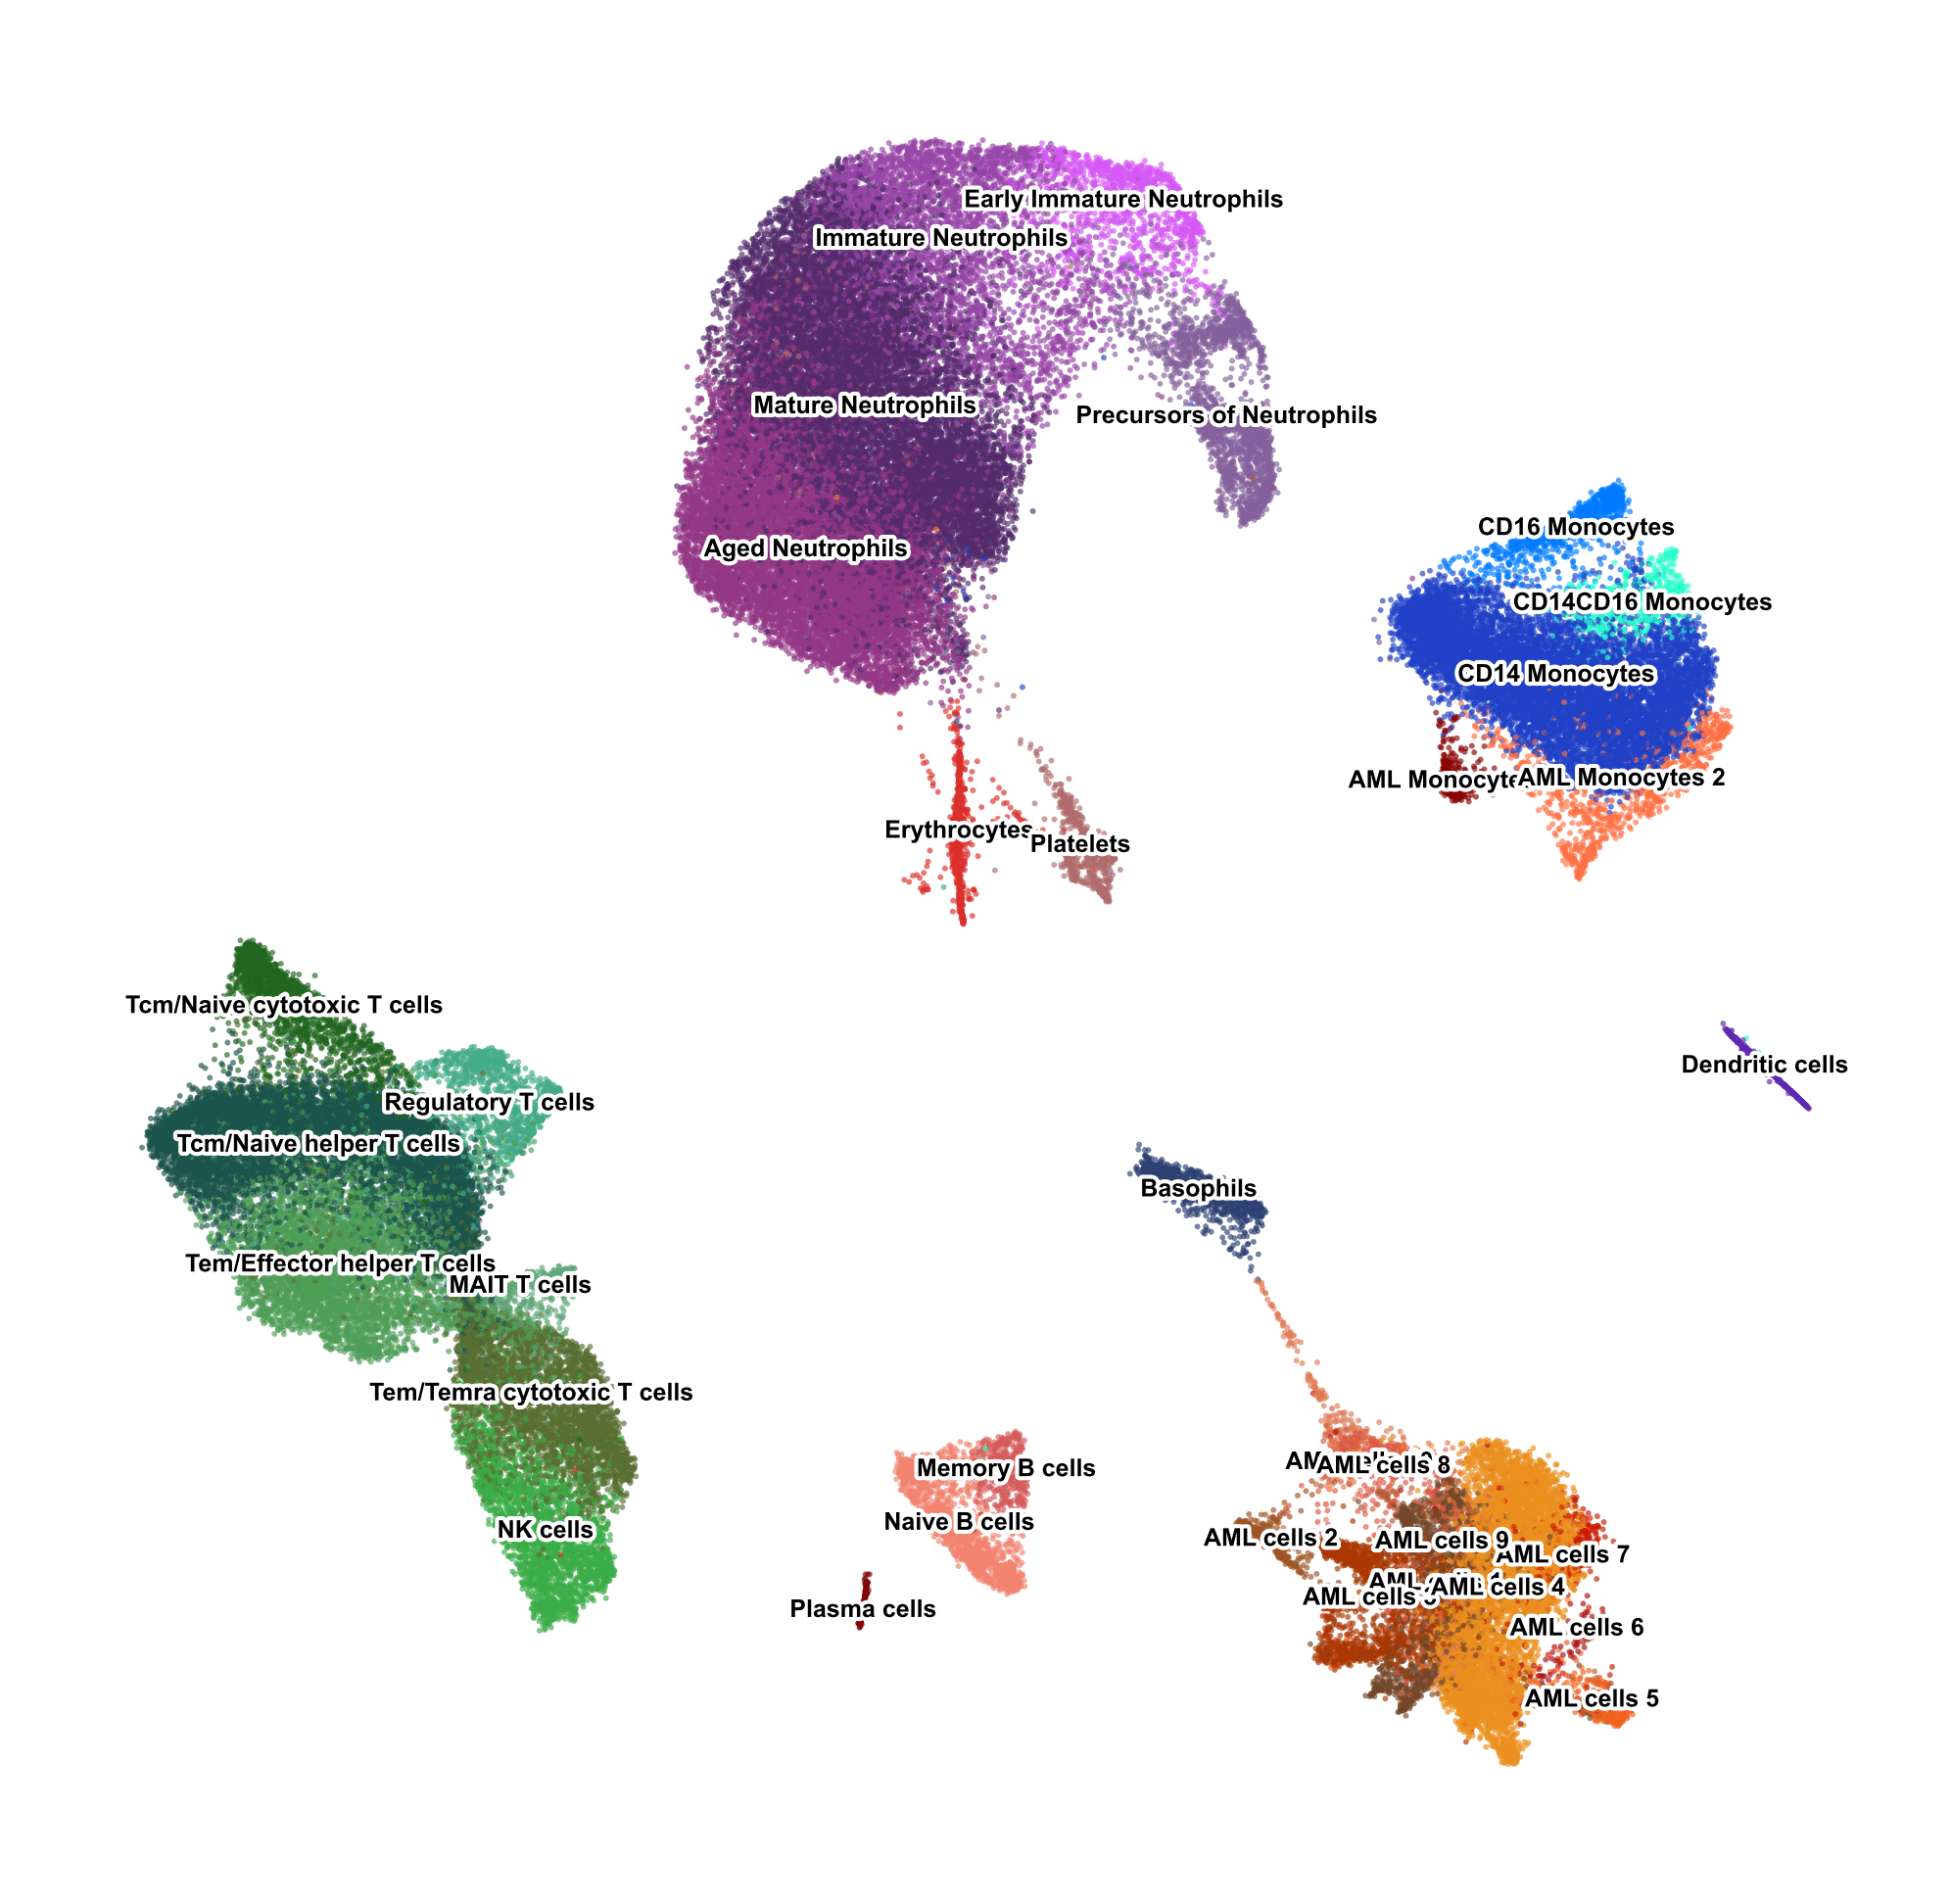

In [14]:
# To randomize cells
np.random.seed(69)
random_indices = np.random.permutation(list(range(adata.shape[0])))


sc.pl.umap(adata[random_indices, :], color = "cell_type_refined", 
           alpha = 0.66, 
           wspace = 0.5,
           ncols = 3,
           s = 2, 
           frameon = False, title = "",
           legend_loc = "on data", legend_fontsize = 3, legend_fontoutline = True, 
           palette = cell_type_color_palette, #{"Plasma cells": "red"}, 
           save = "_cell_type_only_round2_refined_v3.png")

In [17]:
# saving annotated final adata with refined annotation

current_directory = os.getcwd()
fname1 = current_directory+"/backups/bb2_bb3_leiden_2.5_sub_DGE_refined_annotation_%dx%d_%s.h5ad"%(adata.shape[0],adata.shape[1],now())
print(fname1)
adata.write(fname1)

#bb2_bb3_leiden_2.5_sub_DGE_refined_annotation_86447x37733_241107_10h51.h5ad

/Users/denis/microtechnologies/sequencing/240710_BB2_BB3/backups/bb2_bb3_leiden_2.5_sub_DGE_refined_annotation_86447x37733_250117_11h30.h5ad


In [18]:
start = time.time()
# write the pandas dataframe under adata.obs as a separate file
meta = adata.obs
#fname2 = 'backups/obs_info_raw_%dx%d_%s'%(meta.shape[0],meta.shape[1],now())
fname2 = current_directory+"/backups/bb2_bb3_leiden_2.5_sub_DGE_refined_annotation_obs_%dx%d_%s"%(meta.shape[0],meta.shape[1],now())
print(fname2)
save_df(meta,fname2)
print(time.time()-start)


#bb2_bb3_leiden_2.5_sub_DGE_refined_annotation_obs_86447x36_241107_10h51.npz

/Users/denis/microtechnologies/sequencing/240710_BB2_BB3/backups/bb2_bb3_leiden_2.5_sub_DGE_refined_annotation_obs_86447x36_250117_11h30
0.894381046295166
